In [2]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('Brent Spot Price.csv', header=0)

In [9]:
df.head()

,Month,Price
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [8]:
df =df.rename(columns={'Unnamed: 0':'Month' , 'Brent crude oil spot price, Monthly (dollars per barrel)':'Price'} , inplace=False)

## SARIMA Model
***SARIMA - Seasonal Auto Regression Integrated Moving Average*** </br>
* ARIMA model can only handle the data with trend , for handling the data with seasonal effects there comes SARIMA into the picture . <br>
* Seasonality is simply removed by subtracting the corresponding with few time steps back, simply subtracting the values of monday from the previous week monday <br><br>

**SARIMA (p,d,q)(P,D,Q)m**<br>
* p : Trend autoregression order<br>
* d : Trend differnce order <br>
* q : Trend moving average order<br>
***Seasonal Elements***<br>
There are four seasonal elements that are not part of ARIMA that must be configured :<br>
* P : Seasonal Autoregression order<br>
* D : Seasonal Difference order<br>
* Q : Seasonal Moving average order <br>
* m : Number of time steps for a single seasonal period

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
df.index = df.Month

In [13]:
df.drop(df.columns[0] , axis=1 , inplace= True)

In [15]:
df.index = pd.to_datetime(df.index)

In [16]:
df.head()

,Price
Month,
1990-01-01,21.251
1990-02-01,19.813
1990-03-01,18.387
1990-04-01,16.612
1990-05-01,16.352


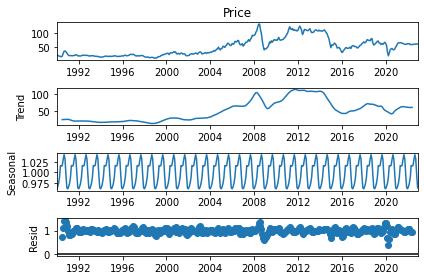

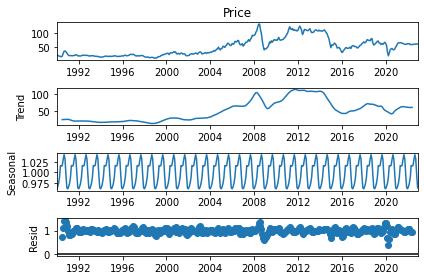

In [23]:
dcmp = seasonal_decompose(df['Price'], model='multiplicative')
dcmp.plot()

### Finding the values for P,Q,D

In [78]:
# D Order 
from statsmodels.tsa.stattools import adfuller

def check_stationart(timeseries):
    dftest = adfuller(timeseries)
    adf = dftest[0]
    pvalue = dftest[1]
    criticalvalue=dftest[4]['5%']
    if(pvalue< 0.05 and adf < criticalvalue):
        print("The series is stationary")
    else:
        print("The series is not stationary")
    

In [79]:
timeseries = dcmp.seasonal
check_stationart(timeseries)

The series is stationary


/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


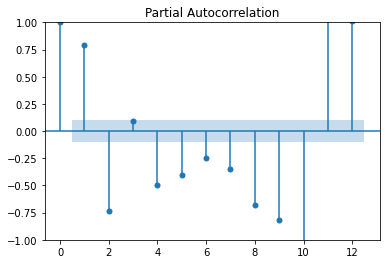

In [85]:
# P order 
seasonal= dcmp.seasonal
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(seasonal , lags =12)
plt.show()

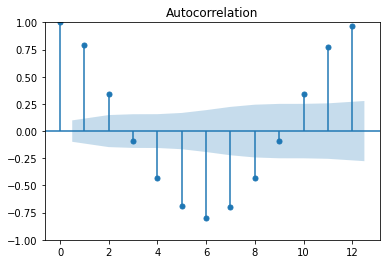

In [87]:
plot_acf(seasonal , lags=12)
plt.show()

In [89]:
model = SARIMAX(df['Price'], order=(5,2,1), seasonal_order=(12,0,8,12))

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
model_fit = model.fit()


/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99546D+00    |proj g|=  1.46597D-01


 This problem is unconstrained.



At iterate    5    f=  2.95304D+00    |proj g|=  2.29436D-02

At iterate   10    f=  2.91565D+00    |proj g|=  8.07649D-02

At iterate   15    f=  2.88627D+00    |proj g|=  3.31274D-02

At iterate   20    f=  2.87854D+00    |proj g|=  6.95301D-03

At iterate   25    f=  2.87727D+00    |proj g|=  1.00130D-02

At iterate   30    f=  2.87642D+00    |proj g|=  1.72459D-02

At iterate   35    f=  2.87513D+00    |proj g|=  9.83803D-03

At iterate   40    f=  2.87468D+00    |proj g|=  2.41327D-03

At iterate   45    f=  2.87435D+00    |proj g|=  4.95172D-03

At iterate   50    f=  2.87414D+00    |proj g|=  4.33554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
residuals = model_fit.resid



<AxesSubplot:xlabel='Month'>

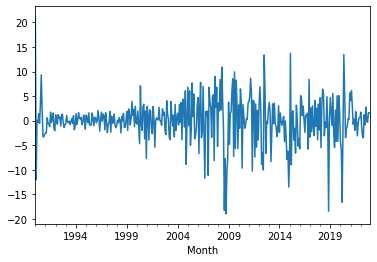

In [93]:
residuals.plot()


In [99]:
forecast=model_fit.forecast(12)
forecast

2023-01-01    60.601826
2023-02-01    59.301992
2023-03-01    58.531656
2023-04-01    58.342878
2023-05-01    58.311474
2023-06-01    57.724060
2023-07-01    57.381392
2023-08-01    59.424829
2023-09-01    60.534822
2023-10-01    64.581380
2023-11-01    67.935724
2023-12-01    71.310081
Freq: MS, Name: predicted_mean, dtype: float64

In [95]:
yhat = model_fit.predict()
yhat

1990-01-01     0.000000
1990-02-01    31.876575
1990-03-01    18.375178
1990-04-01    16.958086
1990-05-01    14.938035
                ...    
2022-08-01    59.950867
2022-09-01    60.375451
2022-10-01    59.362870
2022-11-01    59.485193
2022-12-01    59.435823
Freq: MS, Name: predicted_mean, Length: 396, dtype: float64

In [96]:
import matplotlib.pyplot as plt

In [97]:
df.tail()

,Price
Month,
2022-08-01,60.0
2022-09-01,60.0
2022-10-01,61.0
2022-11-01,61.0
2022-12-01,61.0


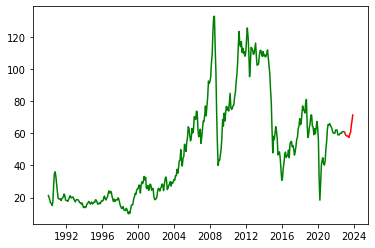

In [98]:
plt.plot(df['Price'],color="green")
plt.plot(forecast, color="red")